### Stochastic SIR model (discrete state, continuous time) in Julia

In [1]:
using DataFrames
using Distributions

In [2]:
function sir(beta,gamma,N,S0,I0,R0,tf)
    t = 0
    S = S0
    I = I0
    R = R0
    ta=DataArray(Float64,0)
    Sa=DataArray(Float64,0)
    Ia=DataArray(Float64,0)
    Ra=DataArray(Float64,0)
    while t < tf
        push!(ta,t)
        push!(Sa,S)
        push!(Ia,I)
        push!(Ra,R)
        pf1 = beta*S*I
        pf2 = gamma*I
        pf = pf1+pf2
        dt = rand(Exponential(1/pf))
        t = t+dt
        if t>tf
            break
        end
        ru = rand()
        if ru<(pf1/pf)
            S=S-1
            I=I+1
        else
            I=I-1
            R=R+1
        end
    end
    results = DataFrame()
    results[:time] = ta
    results[:S] = Sa
    results[:I] = Ia
    results[:R] = Ra
    return(results)
end

sir (generic function with 1 method)

In [3]:
srand(42)

MersenneTwister(UInt32[0x0000002a], Base.dSFMT.DSFMT_state(Int32[964434469, 1073036706, 1860149520, 1073503458, 1687169063, 1073083486, -399267803, 1072983952, -909620556, 1072836235  …  -293054293, 1073002412, -1300127419, 1073642642, 1917177374, -666058738, -337596527, 1830741494, 382, 0]), [1.64879, 1.78639, 1.07348, 1.36027, 1.42523, 1.97645, 1.45162, 1.16015, 1.778, 1.6261  …  1.7593, 1.84751, 1.43425, 1.79251, 1.24761, 1.59121, 1.57693, 1.60592, 1.77807, 1.54728], 382)

In [4]:
sir_out = sir(0.1/1000,0.05,1000,999,1,0,200);

In [5]:
head(sir_out)

6×4 DataFrames.DataFrame
│ Row │ time    │ S     │ I   │ R   │
├─────┼─────────┼───────┼─────┼─────┤
│ 1   │ 0.0     │ 999.0 │ 1.0 │ 0.0 │
│ 2   │ 5.37975 │ 998.0 │ 2.0 │ 0.0 │
│ 3   │ 5.89318 │ 997.0 │ 3.0 │ 0.0 │
│ 4   │ 8.47182 │ 997.0 │ 2.0 │ 1.0 │
│ 5   │ 8.61118 │ 996.0 │ 3.0 │ 1.0 │
│ 6   │ 16.7678 │ 995.0 │ 4.0 │ 1.0 │

#### Visualisation

In [6]:
using StatPlots

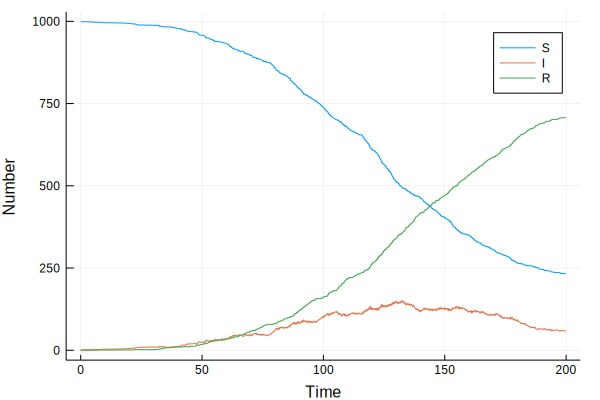

In [7]:
@df sir_out plot(:time, [:S :I :R], xlabel="Time",ylabel="Number")